In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df = pd.read_csv('../data_ml/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# creditcard 부정거래 탐지

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
 df.Time # 처리가 이상하여 날리기로 결정

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [7]:
df.drop(columns='Time',inplace=True)

In [8]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [9]:
df.isnull().sum().sum()

0

In [10]:
# x data, y data divide
y =df['Class']
x = df.drop('Class', axis=1)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=111)

In [12]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [13]:
# 예측값
preds = lr.predict(x_test)

In [14]:
# 평가 classification_report, auc값
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.84      0.68      0.75       101

    accuracy                           1.00     56962
   macro avg       0.92      0.84      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [15]:
from sklearn.metrics import roc_auc_score
# 이렇게 하면 안되고
roc_auc_score(y_test, preds)

0.8414698445627613

In [16]:
lr.predict_proba(x_test)[:,1]

array([0.00351499, 0.00025742, 0.00023339, ..., 0.00122444, 0.00042829,
       0.00029703])

In [17]:
lr.decision_function(x_test)

array([-5.64719626, -8.26452621, -8.36255795, ..., -6.70404529,
       -7.75527959, -8.12136537])

In [18]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, lr.predict_proba(x_test)[:,1] )

0.9692292878186008

In [19]:
# LGBMClassifier를 통한 예측

In [20]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(x_train,y_train)

LGBMClassifier()

In [21]:
# lgbm.score(x_test,y_test)

In [22]:
preds_lgbm = lgbm.predict(x_test)
preds_lgbm

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
print(classification_report(y_test,preds_lgbm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.40      0.65      0.50       101

    accuracy                           1.00     56962
   macro avg       0.70      0.83      0.75     56962
weighted avg       1.00      1.00      1.00     56962



In [24]:
#lgbm에서 확률값 뽑을때
# class 1에 대한 확률값
lgbm.predict_proba(x_test)[:,1]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
       0.00000000e+00, 3.91044853e-55, 8.36883602e-10])

In [25]:
# 1을 맞춘 확률값
roc_auc_score(y_test,lgbm.predict_proba(x_test)[:,1])

0.7993430566566619

In [26]:
# randomforest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [28]:
preds_rfc = rfc.predict(x_test)
preds_rfc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [29]:
rfc.predict_proba(x_test)[:,1]

array([0., 0., 0., ..., 0., 0., 0.])

In [30]:
roc_auc_score(y_test, rfc.predict_proba(x_test)[:,1])

0.9795088282856178

# scaling(표준화,정규화)

In [31]:
x_train.Amount

166262    98.00
243831    58.85
196659     8.86
31984      7.94
178084    60.75
          ...  
105747    43.05
102486    49.00
135892     9.23
10196     87.00
129900     1.00
Name: Amount, Length: 227845, dtype: float64

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [33]:
# scaling 한 데이터를 기반으로 위의 세 모델을 생성하고 평가하시오

In [34]:
# models = [lr,lgbm,rfc ]

# for model in models:
#     model.fit(x_train_scaled,y_train)
#     preds_model = model.predict(x_test_scaled)
#     auc_model = model.predict_proba(x_test_scaled)[:,1]
#     roc_auc = roc_auc_score(y_test,model.predict_proba(x_test_scaled)[:,1])
    
#     print('모델이름: ', model.__class__)
#     print('roc_auc_score: ', roc_auc)

In [35]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score

In [36]:
log = LogisticRegression()
lgbm = LGBMClassifier()
rfc = RandomForestClassifier()

log.fit(x_train,y_train)
lgbm.fit(x_train,y_train)
rfc.fit(x_train,y_train)

log_pre = log.predict(x_test)
lgbm_pre = lgbm.predict(x_test)
rfc_pre = rfc.predict(x_test)

log_pro = log.predict_proba(x_test)
lgbm_pro = lgbm.predict_proba(x_test)
rfc_pro = rfc.predict_proba(x_test)

In [37]:
print('log_f1 : ',f1_score(y_test, log_pre))
print('lgbm_f1 : ',f1_score(y_test, lgbm_pre))
print('rfc_f1 : ',f1_score(y_test, rfc_pre))

log_f1 :  0.7540983606557378
lgbm_f1 :  0.49624060150375937
rfc_f1 :  0.8900523560209423


In [38]:
print('log_auc_score : ', roc_auc_score(y_test, log_pro[:,1]))
print('lgbm_auc_score : ',roc_auc_score(y_test, lgbm_pro[:,1]))
print('rfc_auc_score : ', roc_auc_score(y_test, rfc_pro[:,1]))

log_auc_score :  0.9692292878186008
lgbm_auc_score :  0.7993430566566619
rfc_auc_score :  0.9841621769675957


In [39]:
log = LogisticRegression()
lgbm = LGBMClassifier()
rfc = RandomForestClassifier()

log.fit(x_train_scaled,y_train)
lgbm.fit(x_train_scaled,y_train)
rfc.fit(x_train_scaled,y_train)

log_pre = log.predict(x_test_scaled)
lgbm_pre = lgbm.predict(x_test_scaled)
rfc_pre = rfc.predict(x_test_scaled)

log_pro = log.predict_proba(x_test_scaled)
lgbm_pro = lgbm.predict_proba(x_test_scaled)
rfc_pro = rfc.predict_proba(x_test_scaled)

In [40]:
print('log_f1 : ', f1_score(y_test, log_pre))
print('lgbm_f1 : ',f1_score(y_test, lgbm_pre))
print('rfc_f1 : ', f1_score(y_test, rfc_pre))

log_f1 :  0.7472527472527474
lgbm_f1 :  0.3462686567164179
rfc_f1 :  0.8783068783068783


In [41]:
print('log_auc_score : ', roc_auc_score(y_test, log_pro[:,1]))
print('lgbm_auc_score : ',roc_auc_score(y_test, lgbm_pro[:,1]))
print('rfc_auc_score : ', roc_auc_score(y_test, rfc_pro[:,1]))

log_auc_score :  0.9935096198633423
lgbm_auc_score :  0.728441478185208
rfc_auc_score :  0.9844339879724066


# 이상치(outlier) 제거
 :boxplot을 사용

In [42]:
# pd.DataFrame(x_train_scaled).plot(kind='bar')

<AxesSubplot:>

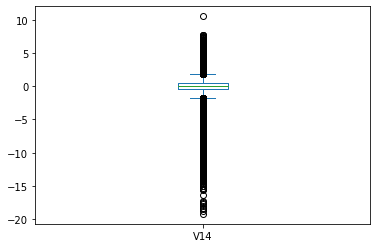

In [43]:
df['V14'].plot(kind='box')

In [44]:
# 25% 와 75% 데이터의 차이값
qu25 = np.percentile(df['V14'].values, 25)
qu75 = np.percentile(df['V14'].values, 75)
iqr = qu75 -qu25
iqr

0.9187238616731425

In [45]:
# 박스밖 limit값 구하기
low_limit = qu25 - iqr*1.5
high_limit = qu75 + iqr*1.5
print(low_limit, high_limit)

-1.803659804964707 1.8712356417278626


In [46]:
x_train_scaled #array 형

array([[ 1.10574809, -0.86230917, -0.95810222, ..., -0.08619806,
        -0.13861722,  0.03988964],
       [ 1.02202287,  0.02455657, -1.3794686 , ..., -0.06272566,
        -0.19257345, -0.11970133],
       [ 0.14237309,  0.55362382, -1.23626219, ..., -0.39385845,
        -0.31960802, -0.32348046],
       ...,
       [-1.12229071,  1.29544028, -0.05453878, ...,  0.66187822,
         0.44380678, -0.3219722 ],
       [-1.01896155, -0.08327497,  1.45139781, ...,  1.3102704 ,
         0.21293027, -0.00495073],
       [ 0.63480976, -0.27176532,  0.58268026, ...,  0.20794987,
         0.09666552, -0.35552095]])

In [47]:
# 이상치 값 불린인덱싱으로 제거

x_train_scaled_no = x_train_scaled[ (x_train_scaled[:,13] >= low_limit) & (x_train_scaled[:,13]<=high_limit) ]

y_train_no = y_train[ (x_train_scaled[:,13] >= low_limit) & (x_train_scaled[:,13]<= high_limit) ] 

In [48]:
# 세 모델 평가

In [50]:
log = LogisticRegression()
lgmb = LGBMClassifier()
rfc = RandomForestClassifier()


models = [log,lgbm,rfc ]
for model in models:
    model.fit(x_train_scaled_no,y_train_no)
    
    preds_no = model.predict(x_test_scaled)
    proba = model.predict_proba(x_test_scaled)
    
    f1 = f1_score(y_test, preds_no)
    roc_auc = roc_auc_score(y_test, proba[:,1])
    
    print(model.__class__.__name__)
    print('f1_score : ', f1)
    print('roc_auc_score : ', roc_auc)
    print('-'*50)

LogisticRegression
f1_score :  0.7753303964757708
roc_auc_score :  0.9957859717313073
--------------------------------------------------
LGBMClassifier
f1_score :  0.0
roc_auc_score :  0.4837938129825364
--------------------------------------------------
RandomForestClassifier
f1_score :  0.6
roc_auc_score :  0.983442513365492
--------------------------------------------------


# imbalanced dataset (불균형데이터 처리)

In [ ]:
y_train_no.value_counts() # 상당히 불균형한 데이터

In [ ]:
# !pip install -U imbalanced-learn

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(random_state=111)
x_train_sm, y_train_sm = smote.fit_resample(x_train_scaled_no, y_train_no)

In [ ]:
y_train_sm.value_counts() # 데이터 증폭시켜줌

In [ ]:
log = LogisticRegression()
lgmb = LGBMClassifier()
rfc = RandomForestClassifier()


models = [log,lgbm,rfc ]
for model in models:
    model.fit(x_train_sm,y_train_sm)
    
    preds_no = model.predict(x_test_scaled)
    proba = model.predict_proba(x_test_scaled)
    
    f1 = f1_score(y_test, preds_no)
    roc_auc = roc_auc_score(y_test, proba[:,1])
    
#     print(model.__class__.__name__)
    print('f1_score : ', f1)
    print('roc_auc_score : ', roc_auc)
    print('-'*50)

## ★ 뭘 적용한다고 무조건 좋다는 것이 아니라 해보고 좋은 것을 찾아야 한다